In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from utils import get_paper_details, filter_df

import matplotlib.pyplot as plt
import pandas as pd

----

### Get citation graph for an individual paper

In [3]:
paper_id = "10.18653/v1/2021.emnlp-main.446" # Transformer Feed-Forward Layers Are Key-Value Memories

paper = get_paper_details(paper_id)

In [4]:
paper.to_df()

,paper_id,title,venue,year,citation_count,influential_citation_count
0,10.18653/v1/2021.emnlp-main.446,Transformer Feed-Forward Layers Are Key-Value ...,Conference on Empirical Methods in Natural Lan...,2020,211,27


In [5]:
paper.retrieve_citations(limit=1000) # 1000 is the maximum

Trying again ...


Trying again ...


In [6]:
paper.citations[0].to_df()

,paper_id,title,venue,year,citation_count,influential_citation_count,cites_result,cites_methodology,cites_background,was_influenced,contexts
0,be431d20e27bafc584858bb76ba41b483cfd514b,Identifying Linear Relational Concepts in Larg...,arXiv.org,2023,0,0,False,False,True,False,[Further work has shown that mid-level multi-l...


In [7]:
citation_graph = paper.citations_to_df()

In [8]:
citation_graph.head()

,paper_id,title,venue,year,citation_count,influential_citation_count,cites_result,cites_methodology,cites_background,was_influenced,contexts
0,be431d20e27bafc584858bb76ba41b483cfd514b,Identifying Linear Relational Concepts in Larg...,arXiv.org,2023,0,0,False,False,True,False,[Further work has shown that mid-level multi-l...
1,e7f7578fd671ca18d115104bcaa80c2950ab70f0,Do Localization Methods Actually Localize Memo...,arXiv.org,2023,0,0,False,False,True,False,[It is generally believed that LLMs use FFN in...
2,05c2e901005201438e807e061823e55fd377176c,Assessing Knowledge Editing in Language Models...,arXiv.org,2023,0,0,False,False,True,False,"[Geva et al. (2020, 2022) show that feed-forwa..."
3,50714ad97ae3a65ff15771b8ec89de47aa8311ab,The Transient Nature of Emergent In-Context Le...,arXiv.org,2023,1,0,True,False,False,False,[These results can be interpreted in light of ...
4,e0b3cdd6639cc702e106f708bd3ba934e646ffba,Forgetting before Learning: Utilizing Parametr...,arXiv.org,2023,0,0,False,False,True,False,"[Geva et al. (Geva et al., 2021) find that the..."


----

### Visualizations

In [9]:
citation_stats = citation_graph['citation_count']
influential_citation_stats = citation_graph['influential_citation_count']

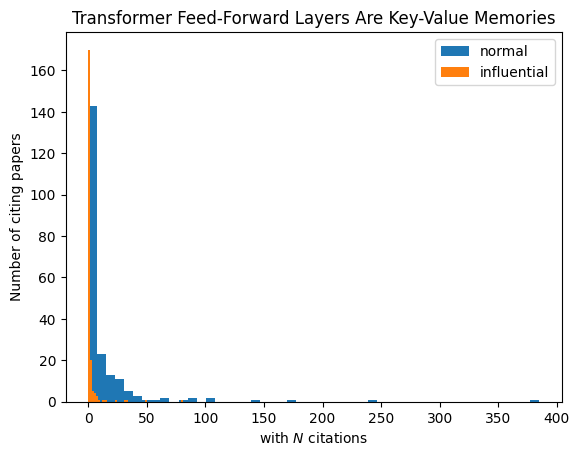

In [10]:
fig, axes = plt.subplots()

axes.hist(citation_stats, bins=50, label="normal")
axes.hist(influential_citation_stats, bins=50, label="influential")

# axes.set_yscale("log")

axes.set_ylabel("Number of citing papers")
axes.set_xlabel(f"with $N$ citations")

axes.set_title(paper.title)
axes.legend(loc="best");

In [11]:
influential_papers = filter_df(citation_graph, was_influenced=True)
normal_papers = filter_df(citation_graph, was_influenced=False)

In [12]:
influential_papers.head()

,paper_id,title,venue,year,citation_count,influential_citation_count,cites_result,cites_methodology,cites_background,was_influenced,contexts
6,e5379c6b2328c1d4832a2efaf276e49324fbb05a,Trends in Integration of Knowledge and Large L...,arXiv.org,2023,0,0,False,False,True,True,[Following the perspective that knowledge resi...
14,41a3c41ba1912e1384849e6898c241af89cc4a11,DEPN: Detecting and Editing Privacy Neurons in...,arXiv.org,2023,0,0,False,False,True,True,"[Second, the Memory-based Editing strategy (Mi..."
15,7c57530318ae6c6e49c835f23e75affd9cf0827d,Analyzing Vision Transformers for Image Classi...,arXiv.org,2023,0,0,False,True,True,True,"[For example, in NLP transformers some keys in..."
17,9f20b0aa426c18512e820d1c1311378f71114d8a,Codebook Features: Sparse and Discrete Interpr...,arXiv.org,2023,0,0,False,False,True,True,"[…2021; Bau et al., 2020b) and algorithms (Giu..."
38,4941b37136cdf1836b78ddb6cee65a28c3ce45f0,ChatKBQA: A Generate-then-Retrieve Framework f...,arXiv.org,2023,0,0,False,True,True,True,"[Freeze (Geva et al., 2021) speeds up the mode..."


In [13]:
intent_influential = {r: influential_papers[r].sum() for r in ["cites_result", "cites_methodology", "cites_background"]}
intent_normal = {r: normal_papers[r].sum() for r in ["cites_result", "cites_methodology", "cites_background"]}

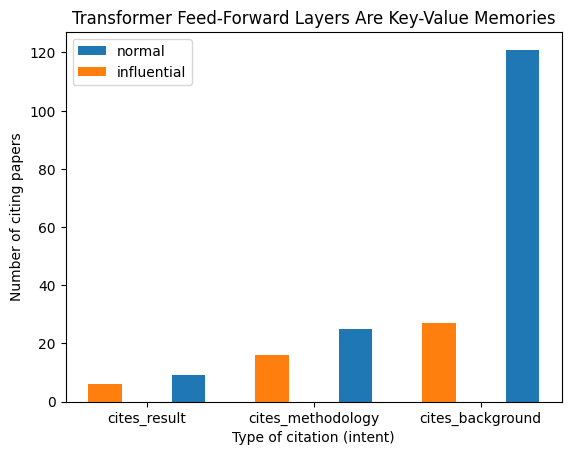

In [14]:
fig, axes = plt.subplots()

axes.bar([0.25, 1.25, 2.25], intent_normal.values(), width=0.2, label="normal")
axes.bar([-0.25, 0.75, 1.75], intent_influential.values(), width=0.2, label="influential")

axes.set_ylabel("Number of citing papers")
axes.set_xlabel(f"Type of citation (intent)")
axes.set_xticks([0, 1, 2])
axes.set_xticklabels(intent_influential.keys())

axes.set_title(paper.title)
axes.legend(loc="best");


In [15]:
citations_per_year = citation_graph.groupby(['year'])['year'].count()

In [16]:
citations_per_year

year
2020      2
2021     17
2022     44
2023    148
Name: year, dtype: int64

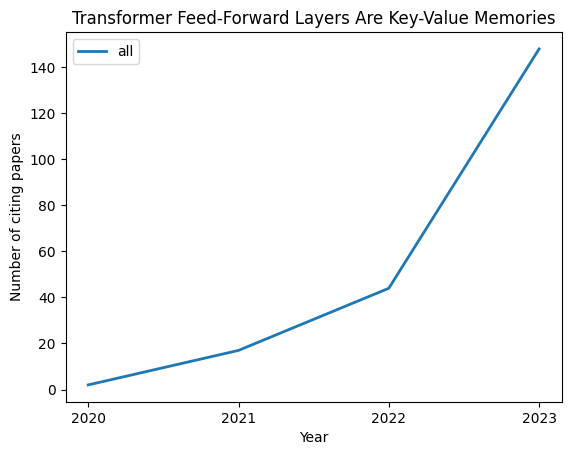

In [17]:
fig, axes = plt.subplots()

axes.plot(citations_per_year.values, linewidth=2.0, label="all")

axes.set_ylabel("Number of citing papers")
axes.set_xlabel(f"Year")
axes.set_xticks(range(len(citations_per_year.index)))
axes.set_xticklabels(citations_per_year.index)
# axes.set_xticklabels(intent_influential.keys())

axes.set_title(paper.title)
axes.legend(loc="best");
